# ACL-Style Figure Configuration Guide

**This notebook generates publication-ready figures following ACL (Association for Computational Linguistics) formatting standards.**

## Design Principles

✓ **Vector format (PDF)** - All figures export as PDFs with embedded fonts  
✓ **Color-blind safe palette** - Wong 2011 palette works in grayscale  
✓ **Clean, minimal design** - No chart junk, clear data-to-ink ratio  
✓ **Readable at print size** - Optimized for two-column A4 layout  
✓ **Consistent typography** - Sans-serif fonts, appropriate sizing  
✓ **Accessible** - Combines color with line styles/markers for clarity

## Color Palette (Color-blind Safe)

The notebook uses the Okabe & Ito / Wong 2011 color-blind safe palette:
- Blue: `#0173B2`
- Orange: `#DE8F05`  
- Green: `#029E73`
- Purple: `#CC78BC`
- Yellow: `#ECA400`
- Sky Blue: `#56B4E9`
- Red: `#CA3542`
- Gray: `#949494`

## Export Settings

- **Format**: PDF (vector)
- **DPI**: 300 (high-resolution for print)
- **Font type**: TrueType (embedded)
- **Figure size**: 7×4 inches (single-column width)

All figures are saved to `DataSet_Figures/` directory.

# Análisis de Modismos Colombianos
## Visualizaciones Estadísticas del Dataset

Este notebook presenta visualizaciones estadísticas del dataset de modismos colombianos, incluyendo:
- Distribución por fuente
- Análisis de ejemplos
- Distribución de significados
- Categorías gramaticales
- Análisis de longitud de textos
- Distribución geográfica por región

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# ACL-STYLE FIGURE CONFIGURATION
# ============================================================================
# Publication-ready settings for ACL conference proceedings
# Designed for two-column A4 format with color-blind safe palette

# Reset to defaults first
plt.rcdefaults()

# Figure size: optimized for single column width (~3.3 inches in ACL two-column)
# Scale up for better visibility, but keep aspect ratio reasonable
plt.rcParams['figure.figsize'] = (7, 4)  # Moderate size for readability
plt.rcParams['figure.dpi'] = 100  # Screen display
plt.rcParams['savefig.dpi'] = 300  # High-res for print
plt.rcParams['savefig.format'] = 'pdf'  # Vector format
plt.rcParams['pdf.fonttype'] = 42  # Ensure fonts are embedded (TrueType)
plt.rcParams['ps.fonttype'] = 42

# Font: Clean sans-serif, similar to Computer Modern Sans
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['font.size'] = 9  # Base font size for print legibility
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.title_fontsize'] = 9

# Lines and markers: thick enough for print
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 6
plt.rcParams['patch.linewidth'] = 1.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.linewidth'] = 0.5

# Grid: minimal, subtle
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.axisbelow'] = True  # Grid behind data

# Spines: clean look
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Legend: clean, non-intrusive
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['legend.edgecolor'] = '0.8'
plt.rcParams['legend.fancybox'] = False

# Color-blind safe palette (Wong 2011, Okabe & Ito)
# Works in grayscale and for most types of color blindness
ACL_COLORS = {
    'blue': '#0173B2',      # Blue
    'orange': '#DE8F05',    # Orange  
    'green': '#029E73',     # Green
    'yellow': '#ECA400',    # Yellow
    'purple': '#CC78BC',    # Purple
    'cyan': '#56B4E9',      # Sky Blue
    'red': '#CA3542',       # Red
    'gray': '#949494'       # Gray
}

# Default color cycle (color-blind safe)
ACL_COLOR_CYCLE = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC', 
                   '#ECA400', '#56B4E9', '#CA3542', '#949494']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=ACL_COLOR_CYCLE)

# Tight layout by default
plt.rcParams['figure.autolayout'] = False  # We'll use tight_layout explicitly
plt.rcParams['figure.constrained_layout.use'] = False

# Output directory for figures
OUTPUT_DIR = Path('DataSet_Figures')
OUTPUT_DIR.mkdir(exist_ok=True)

print("✓ ACL-style configuration loaded")
print(f"  - Color-blind safe palette: {len(ACL_COLOR_CYCLE)} colors")
print(f"  - Export format: PDF (vector)")
print(f"  - Print DPI: {plt.rcParams['savefig.dpi']}")


# Function to load data from a JSON file.
def load_data(location):
    return pd.read_json(location)


# Function to plot the number of idioms by source.
def graficar_modismos_por_fuente(df):
    """
    Genera un gráfico de barras con la cantidad de modismos por fuente.
    """
    source_counts = df["Fuente"].value_counts()

    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(
        source_counts.index,
        source_counts.values,
        color=[ACL_COLORS['blue'], ACL_COLORS['cyan']],
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )

    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=8
        )

    ax.set_title("Number of Idioms by Source", pad=10)
    ax.set_xlabel("Source")
    ax.set_ylabel("Number of Idioms")
    ax.set_ylim(0, source_counts.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'modismos_por_fuente.pdf', bbox_inches='tight', dpi=300)
    plt.show()


# Function to plot the proportion of records with and without examples.
def graficar_proporcion_ejemplos(df):
    """
    Genera un gráfico de torta con la proporción de registros con y sin ejemplo.
    """
    con_ejemplo = df['ejemplo'].notnull().sum()
    sin_ejemplo = df['ejemplo'].isnull().sum()

    labels = ['With Example', 'Without Example']
    sizes = [con_ejemplo, sin_ejemplo]
    explode = (0, 0.1)  # Separate second slice for emphasis

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(
        sizes,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=False,
        startangle=140,
        colors=[ACL_COLORS['blue'], ACL_COLORS['cyan']],
        textprops={'fontsize': 9}
    )

    ax.set_title('Proportion of Records With and Without Examples', pad=10)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'proporcion_ejemplos.pdf', bbox_inches='tight', dpi=300)
    plt.show()


# Function to plot the distribution of the number of meanings per idiom.
def graficar_distribucion_significados_por_modismo(df):
    """
    Genera un gráfico de barras con la distribución del número de significados por modismo.
    """
    # Contar cuántos significados tiene cada modismo
    meaning_counts_per_idiom = df.groupby('modismo').size()
    # Obtener la distribución: cuántos modismos tienen 1, 2, 3... significados
    distribution_of_meanings = meaning_counts_per_idiom.value_counts().sort_index()

    fig, ax = plt.subplots(figsize=(7, 4.5))
    bars = ax.bar(
        distribution_of_meanings.index.astype(str),
        distribution_of_meanings.values,
        color=ACL_COLORS['blue'],
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )

    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=8
        )

    ax.set_title('Distribution of Number of Meanings per Idiom', pad=10)
    ax.set_xlabel('Number of Meanings per Idiom')
    ax.set_ylabel('Number of Unique Idioms')
    ax.set_ylim(0, distribution_of_meanings.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'distribucion_significados.pdf', bbox_inches='tight', dpi=300)
    plt.show()


# Function to plot the distribution of the number of words per idiom.
def graficar_distribucion_palabras_por_modismo(df):
    """
    Genera un gráfico de barras con la distribución del número de palabras por modismo.
    """
    unique_idioms = df['modismo'].dropna().unique()

    # Contar palabras separadas por espacios en cada modismo
    word_counts = [len(idiom.split()) for idiom in unique_idioms]
    word_count_series = pd.Series(word_counts).value_counts().sort_index()

    fig, ax = plt.subplots(figsize=(7, 4.5))
    bars = ax.bar(
        word_count_series.index.astype(str),
        word_count_series.values,
        color=ACL_COLORS['blue'],
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )

    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=8
        )

    ax.set_title('Distribution of Number of Words per Idiom', pad=10)
    ax.set_xlabel('Number of Words per Idiom')
    ax.set_ylabel('Number of Unique Idioms')
    ax.set_ylim(0, word_count_series.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'distribucion_palabras.pdf', bbox_inches='tight', dpi=300)
    plt.show()


# Function to classify idioms by grammatical category and plot main and secondary categories.
def graficar_categorias_gramaticales_modismos(df, top_n=3):
    """
    Clasifica modismos por categoría gramatical y grafica categorías principales y secundarias.
    """
    def clasificar(idiom):
        # Phrases or locutions (contain spaces)
        if ' ' in idiom:
            return 'Phrase / Locution'
        # Verbs in infinitive (typical endings)
        if re.search(r'(ar|er|ir)$', idiom):
            return 'Verb (infinitive)'
        # Adverbs (suffix -mente)
        if re.search(r'mente$', idiom):
            return 'Adverb'
        # Adjectives (common suffixes)
        if re.search(r'(ado|ada|ido|ida|oso|osa|ble|al)$', idiom):
            return 'Adjective'
        # Nouns (common nominal suffixes)
        if re.search(r'(ión|dad|tad|ncia|or|ora)$', idiom):
            return 'Noun'
        return 'Other Category'

    unique_idioms = df['modismo'].dropna().unique()
    categories = [clasificar(idiom) for idiom in unique_idioms]
    category_counts = pd.Series(categories).value_counts()

    # Separar categorías principales y secundarias
    top_categories = category_counts.head(top_n)
    remaining_categories = category_counts.tail(len(category_counts) - top_n)

    fig, axes = plt.subplots(2, 1, figsize=(9, 10))
    fig.suptitle('Classification of Idioms by Grammatical Category', fontsize=11)

    # Plot main and secondary categories
    colors_main = [ACL_COLORS['blue'], ACL_COLORS['orange'], ACL_COLORS['green']]
    colors_secondary = [ACL_COLORS['cyan'], ACL_COLORS['purple'], ACL_COLORS['yellow']]
    
    for ax, series, title, colors in [
        (axes[0], top_categories, 'Main Categories', colors_main),
        (axes[1], remaining_categories, 'Secondary Categories', colors_secondary)
    ]:
        bars = ax.bar(series.index, series.values, 
                     color=colors[:len(series)],
                     edgecolor='black',
                     linewidth=0.8,
                     alpha=0.85)
        ax.set_title(title, pad=10)
        ax.set_ylabel('Number of Unique Idioms')
        ax.set_ylim(0, series.max() * 1.15)
        ax.grid(True, alpha=0.3, axis='y')

        # Añadir etiquetas con el valor exacto sobre cada barra
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                int(yval),
                va='bottom',
                ha='center',
                fontsize=8
            )

    axes[1].set_xlabel('Grammatical Category')
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.savefig(OUTPUT_DIR / 'categorias_gramaticales.pdf', bbox_inches='tight', dpi=300)
    plt.show()


# Function to plot histograms of text lengths for meanings and examples.
def graficar_longitud_textos(df):
    """
    Genera histogramas de la longitud (en caracteres) de significados y ejemplos.
    """
    columnas = [
        ('significado', 'Distribution of Meaning Length', ACL_COLORS['blue']),
        ('ejemplo', 'Distribution of Example Length', ACL_COLORS['orange'])
    ]

    for columna, titulo, color in columnas:
        longitudes = df[columna].dropna().str.len()

        fig, ax = plt.subplots(figsize=(7, 4))
        ax.hist(longitudes, bins=50, color=color, edgecolor='black', 
               linewidth=0.5, alpha=0.85)
        ax.set_title(titulo, pad=10)
        ax.set_xlabel('Number of Characters')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        safe_name = columna + '_caracteres'
        plt.savefig(OUTPUT_DIR / f'longitud_{safe_name}.pdf', bbox_inches='tight', dpi=300)
        plt.show()


# Function to plot histograms of text lengths in words for meanings and examples.
def graficar_longitud_textos_por_palabras(df):
    """
    Genera histogramas de la longitud (en palabras) de significados y ejemplos.
    """
    columnas = [
        ('significado', 'Distribution of Meaning Length in Words', ACL_COLORS['blue']),
        ('ejemplo', 'Distribution of Example Length in Words', ACL_COLORS['orange'])
    ]

    for columna, titulo, color in columnas:
        # Contar palabras separadas por espacios
        longitudes = df[columna].dropna().str.split().str.len()

        fig, ax = plt.subplots(figsize=(7, 4))
        ax.hist(longitudes, bins=50, color=color, edgecolor='black',
               linewidth=0.5, alpha=0.85)
        ax.set_title(titulo, pad=10)
        ax.set_xlabel('Number of Words')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        safe_name = columna + '_palabras'
        plt.savefig(OUTPUT_DIR / f'longitud_{safe_name}.pdf', bbox_inches='tight', dpi=300)
        plt.show()


# Function to plot the number of occurrences by region.
def graficar_ocurrencias_por_region(df):
    """
    Genera un gráfico de barras con la cantidad de ocurrencias por grupo regional.
    Procesa el campo 'región' y agrupa por regiones principales de Colombia.
    """
    # Definition of Colombian regional groups
    REGION_GROUPS = {
        'Caribbean Region': {
            'Atlántico', 'Bolívar', 'La Guajira', 'Magdalena', 'Costa Atlántica',
            'Cesar', 'Córdoba', 'Sucre'
        },
        'Pacific Region': {
            'Chocó', 'Valle del Cauca', 'Cauca', 'Nariño', 'Costa del Pacífico'
        },
        'Andean Region': {
            'Antioquia', 'Boyacá', 'Caldas', 'Cundinamarca', 'Huila', 
            'Norte de Santander', 'Santander', 'Quindío', 'Risaralda', 
            'Tolima', 'Bogotá'
        },
        'Orinoco Region': {
            'Llanos Orientales', 'Arauca', 'Casanare', 'Meta', 'Vichada'
        },
        'Amazon Region': {
            'Amazonas', 'Caquetá', 'Putumayo', 'Guainía', 'Guaviare', 'Vaupés'
        }
    }
    
    # Diccionario de mapeo de abreviaturas a nombres completos
    region_mapping = {
        'Amaz.': 'Amazonas',
        'Ant.': 'Antioquia',
        'Atl.': 'Atlántico',
        'Bog.': 'Bogotá',
        'Bol.': 'Bolívar',
        'Boy.': 'Boyacá',
        'Cald.': 'Caldas',
        'Córd.': 'Córdoba',
        'Costa Atl.': 'Costa Atlántica',
        'Costa Pacíf.': 'Costa del Pacífico',
        'Cund.': 'Cundinamarca',
        'Guaj.': 'La Guajira',
        'Llanos': 'Llanos Orientales',
        'Magd.': 'Magdalena',
        'Nar.': 'Nariño',
        'NStder.': 'Norte de Santander',
        'Quind.': 'Quindío',
        'Risar.': 'Risaralda',
        'Stder.': 'Santander',
        'Tol.': 'Tolima'
    }
    
    # Crear mapeo inverso: región específica → grupo regional
    region_to_group = {}
    for group_name, regions in REGION_GROUPS.items():
        for region in regions:
            region_to_group[region] = group_name
    
    # Contar ocurrencias por grupo regional
    group_counts = {}
    
    for regiones in df['región'].dropna():
        # Separar las regiones por coma y procesar cada una
        for region in regiones.split(','):
            region = region.strip()
            # Normalizar usando el diccionario de mapeo
            region_normalizada = region_mapping.get(region, region)
            # Mapear a grupo regional
            grupo = region_to_group.get(region_normalizada)
            if grupo:
                group_counts[grupo] = group_counts.get(grupo, 0) + 1
    
    # Convertir a Series y ordenar por cantidad (descendente)
    group_series = pd.Series(group_counts).sort_values(ascending=False)
    
    # Escala de azules (de más oscuro a más claro)
    blue_scale = ['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef']
    colors = blue_scale[:len(group_series)]
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(
        range(len(group_series)),
        group_series.values,
        color=colors,
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )
    
    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(group_series)))
    ax.set_xticklabels(group_series.index, rotation=20, ha='right')
    
    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=8
        )
    
    ax.set_title('Number of Idiom Occurrences by Region', fontsize=10, pad=10)
    ax.set_xlabel('Regional Group')
    ax.set_ylabel('Number of Occurrences')
    ax.set_ylim(0, group_series.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'ocurrencias_por_region.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    # Print detailed statistics
    total_ocurrencias = group_series.sum()
    print(f"\n{'='*60}")
    print(f"STATISTICS OF OCCURRENCES BY REGION")
    print(f"{'='*60}")
    print(f"Total occurrences counted: {int(total_ocurrencias):,}")
    print(f"Total records with region in dataset: {df['región'].notna().sum():,}")
    print(f"\nBreakdown by region:")
    for region, count in group_series.items():
        porcentaje = (count / total_ocurrencias) * 100
        print(f"  {region:25s}: {int(count):4d} ({porcentaje:5.1f}%)")
    print(f"{'='*60}\n")


# Function to plot unique idioms by region (not total occurrences).
def graficar_modismos_unicos_por_region(df):
    """
    Genera un gráfico de barras con la cantidad de MODISMOS ÚNICOS por grupo regional.
    
    REGLA DE CONTEO:
    - Cada modismo se cuenta solo UNA VEZ por región, sin importar:
      * Cuántas definiciones/significados tenga
      * Cuántos departamentos de esa región tenga
    - Solo se cuenta múltiples veces si aparece en DIFERENTES regiones
    
    Ejemplo:
    Modismo "chimba" con 3 significados:
    - Significado 1: "Antioquia, Caldas" (Región Andina)
    - Significado 2: "Bogotá" (Región Andina)
    - Significado 3: "Costa Atlántica" (Región Caribe)
    
    Resultado: "chimba" cuenta 2 veces (1 en Andina, 1 en Caribe)
    """
    # Definition of Colombian regional groups
    REGION_GROUPS = {
        'Caribbean Region': {
            'Atlántico', 'Bolívar', 'La Guajira', 'Magdalena', 'Costa Atlántica',
            'Cesar', 'Córdoba', 'Sucre'
        },
        'Pacific Region': {
            'Chocó', 'Valle del Cauca', 'Cauca', 'Nariño', 'Costa del Pacífico'
        },
        'Andean Region': {
            'Antioquia', 'Boyacá', 'Caldas', 'Cundinamarca', 'Huila', 
            'Norte de Santander', 'Santander', 'Quindío', 'Risaralda', 
            'Tolima', 'Bogotá'
        },
        'Orinoco Region': {
            'Llanos Orientales', 'Arauca', 'Casanare', 'Meta', 'Vichada'
        },
        'Amazon Region': {
            'Amazonas', 'Caquetá', 'Putumayo', 'Guainía', 'Guaviare', 'Vaupés'
        }
    }
    
    # Diccionario de mapeo de abreviaturas a nombres completos
    region_mapping = {
        'Amaz.': 'Amazonas',
        'Ant.': 'Antioquia',
        'Atl.': 'Atlántico',
        'Bog.': 'Bogotá',
        'Bol.': 'Bolívar',
        'Boy.': 'Boyacá',
        'Cald.': 'Caldas',
        'Córd.': 'Córdoba',
        'Costa Atl.': 'Costa Atlántica',
        'Costa Pacíf.': 'Costa del Pacífico',
        'Cund.': 'Cundinamarca',
        'Guaj.': 'La Guajira',
        'Llanos': 'Llanos Orientales',
        'Magd.': 'Magdalena',
        'Nar.': 'Nariño',
        'NStder.': 'Norte de Santander',
        'Quind.': 'Quindío',
        'Risar.': 'Risaralda',
        'Stder.': 'Santander',
        'Tol.': 'Tolima'
    }
    
    # Crear mapeo inverso: región específica → grupo regional
    region_to_group = {}
    for group_name, regions in REGION_GROUPS.items():
        for region in regions:
            region_to_group[region] = group_name
    
    # PASO 1: Para cada modismo, recolectar TODAS las regiones donde aparece
    # (consolidando todas sus definiciones/significados)
    modismo_to_region_groups = {}
    
    for _, row in df.dropna(subset=['región', 'modismo']).iterrows():
        modismo = row['modismo']
        regiones = row['región']
        
        # Inicializar set de grupos regionales para este modismo si no existe
        if modismo not in modismo_to_region_groups:
            modismo_to_region_groups[modismo] = set()
        
        # Separar las regiones por coma y mapear a grupos regionales
        for region in regiones.split(','):
            region = region.strip()
            # Normalizar usando el diccionario de mapeo
            region_normalizada = region_mapping.get(region, region)
            # Mapear a grupo regional
            grupo = region_to_group.get(region_normalizada)
            if grupo:
                # Agregar el grupo regional al set del modismo
                modismo_to_region_groups[modismo].add(grupo)
    
    # PASO 2: Contar cuántos modismos únicos tiene cada región
    unique_modismos_by_group = {group: set() for group in REGION_GROUPS.keys()}
    
    for modismo, grupos_regionales in modismo_to_region_groups.items():
        for grupo in grupos_regionales:
            unique_modismos_by_group[grupo].add(modismo)
    
    # Contar modismos únicos por grupo
    group_counts = {grupo: len(modismos) for grupo, modismos in unique_modismos_by_group.items() if len(modismos) > 0}
    
    # Convertir a Series y ordenar por cantidad (descendente)
    group_series = pd.Series(group_counts).sort_values(ascending=False)
    
    # Escala de azules (de más oscuro a más claro)
    blue_scale = ['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef']
    colors = blue_scale[:len(group_series)]
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(
        range(len(group_series)),
        group_series.values,
        color=colors,
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )
    
    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(group_series)))
    ax.set_xticklabels(group_series.index, rotation=20, ha='right')
    
    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=8
        )
    
    ax.set_title('Number of Unique Idioms by Region', fontsize=10, pad=10)
    ax.set_xlabel('Regional Group')
    ax.set_ylabel('Number of Unique Idioms')
    ax.set_ylim(0, group_series.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'modismos_unicos_por_region.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    # Print detailed statistics
    total_modismos_unicos = len(df['modismo'].dropna().unique())
    modismos_con_region = df.dropna(subset=['región', 'modismo'])['modismo'].nunique()
    total_unicos_regiones = group_series.sum()
    
    # Calculate how many idioms appear in multiple regions
    modismos_multiples_regiones = sum(1 for grupos in modismo_to_region_groups.values() if len(grupos) > 1)
    
    print(f"\n{'='*70}")
    print(f"STATISTICS OF UNIQUE IDIOMS BY REGION")
    print(f"{'='*70}")
    print(f"Total unique idioms in dataset: {total_modismos_unicos:,}")
    print(f"Unique idioms with defined region: {modismos_con_region:,}")
    print(f"Idioms appearing in multiple regions: {modismos_multiples_regiones:,}")
    print(f"\nSum of counts by region: {int(total_unicos_regiones):,}")
    print(f"\nCOUNTING RULE:")
    print(f"  • Each idiom counts 1 time per region (regardless of definitions)")
    print(f"  • Multiple departments in same region = 1 count")
    print(f"  • Only counts multiple times if in different regions")
    print(f"\nBreakdown by region:")
    for region, count in group_series.items():
        porcentaje = (count / total_unicos_regiones) * 100
        print(f"  {region:25s}: {int(count):4d} ({porcentaje:5.1f}%)")
    print(f"{'='*70}\n")


# Function to plot idioms by number of regions they appear in
def graficar_distribucion_modismos_por_regiones(df):
    """
    Genera un gráfico de barras mostrando cuántos modismos aparecen en 
    1 región, 2 regiones, 3 regiones, etc.
    
    Este gráfico muestra los 554 modismos únicos con región definida,
    clasificados por su cobertura geográfica.
    """
    # Definition of Colombian regional groups
    REGION_GROUPS = {
        'Caribbean Region': {
            'Atlántico', 'Bolívar', 'La Guajira', 'Magdalena', 'Costa Atlántica',
            'Cesar', 'Córdoba', 'Sucre'
        },
        'Pacific Region': {
            'Chocó', 'Valle del Cauca', 'Cauca', 'Nariño', 'Costa del Pacífico'
        },
        'Andean Region': {
            'Antioquia', 'Boyacá', 'Caldas', 'Cundinamarca', 'Huila', 
            'Norte de Santander', 'Santander', 'Quindío', 'Risaralda', 
            'Tolima', 'Bogotá'
        },
        'Orinoco Region': {
            'Llanos Orientales', 'Arauca', 'Casanare', 'Meta', 'Vichada'
        },
        'Amazon Region': {
            'Amazonas', 'Caquetá', 'Putumayo', 'Guainía', 'Guaviare', 'Vaupés'
        }
    }
    
    # Diccionario de mapeo de abreviaturas a nombres completos
    region_mapping = {
        'Amaz.': 'Amazonas',
        'Ant.': 'Antioquia',
        'Atl.': 'Atlántico',
        'Bog.': 'Bogotá',
        'Bol.': 'Bolívar',
        'Boy.': 'Boyacá',
        'Cald.': 'Caldas',
        'Córd.': 'Córdoba',
        'Costa Atl.': 'Costa Atlántica',
        'Costa Pacíf.': 'Costa del Pacífico',
        'Cund.': 'Cundinamarca',
        'Guaj.': 'La Guajira',
        'Llanos': 'Llanos Orientales',
        'Magd.': 'Magdalena',
        'Nar.': 'Nariño',
        'NStder.': 'Norte de Santander',
        'Quind.': 'Quindío',
        'Risar.': 'Risaralda',
        'Stder.': 'Santander',
        'Tol.': 'Tolima'
    }
    
    # Crear mapeo inverso: región específica → grupo regional
    region_to_group = {}
    for group_name, regions in REGION_GROUPS.items():
        for region in regions:
            region_to_group[region] = group_name
    
    # Para cada modismo, recolectar todas las regiones donde aparece
    modismo_to_region_groups = {}
    
    for _, row in df.dropna(subset=['región', 'modismo']).iterrows():
        modismo = row['modismo']
        regiones = row['región']
        
        if modismo not in modismo_to_region_groups:
            modismo_to_region_groups[modismo] = set()
        
        for region in regiones.split(','):
            region = region.strip()
            region_normalizada = region_mapping.get(region, region)
            grupo = region_to_group.get(region_normalizada)
            if grupo:
                modismo_to_region_groups[modismo].add(grupo)
    
    # Contar cuántos modismos aparecen en N regiones
    region_count_distribution = {}
    for modismo, grupos_regionales in modismo_to_region_groups.items():
        num_regiones = len(grupos_regionales)
        region_count_distribution[num_regiones] = region_count_distribution.get(num_regiones, 0) + 1
    
    # Convertir a Series ordenada
    distribution_series = pd.Series(region_count_distribution).sort_index()
    
    # Crear labels descriptivos
    labels = []
    for n in distribution_series.index:
        if n == 1:
            labels.append('1 region\n(Regional)')
        elif n == 2:
            labels.append('2 regions\n(Bi-regional)')
        elif n == 3:
            labels.append('3 regions\n(Multi-regional)')
        else:
            labels.append(f'{n} regions')
    
    # Colores degradados de azul
    colors = ['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef'][:len(distribution_series)]
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(
        range(len(distribution_series)),
        distribution_series.values,
        color=colors,
        edgecolor='black',
        linewidth=0.8,
        alpha=0.85
    )
    
    # Configurar etiquetas del eje X
    ax.set_xticks(range(len(distribution_series)))
    ax.set_xticklabels(labels, fontsize=8)
    
    # Añadir etiquetas con el valor exacto sobre cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            va='bottom',
            ha='center',
            fontsize=9,
            fontweight='bold'
        )
    
    ax.set_title('Distribution of Idioms by Regional Coverage', fontsize=10, pad=10)
    ax.set_xlabel('Number of Regions per Idiom')
    ax.set_ylabel('Number of Unique Idioms')
    ax.set_ylim(0, distribution_series.max() * 1.15)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'distribucion_modismos_por_regiones.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    # Print detailed statistics
    total_modismos = distribution_series.sum()
    modismos_regionales = distribution_series.get(1, 0)
    modismos_multiregionales = total_modismos - modismos_regionales
    
    print(f"\n{'='*70}")
    print(f"DISTRIBUTION OF 554 UNIQUE IDIOMS BY REGIONAL COVERAGE")
    print(f"{'='*70}")
    print(f"Total unique idioms with region: {int(total_modismos):,}")
    print(f"\nRegional idioms (appear in 1 region only): {int(modismos_regionales):,} ({modismos_regionales/total_modismos*100:.1f}%)")
    print(f"Multi-regional idioms (appear in 2+ regions): {int(modismos_multiregionales):,} ({modismos_multiregionales/total_modismos*100:.1f}%)")
    print(f"\nDetailed breakdown:")
    for n_regiones, count in distribution_series.items():
        porcentaje = (count / total_modismos) * 100
        if n_regiones == 1:
            categoria = "Regional (exclusive to 1 region)"
        else:
            categoria = f"Multi-regional (shared across {n_regiones} regions)"
        print(f"  {categoria:45s}: {int(count):4d} ({porcentaje:5.1f}%)")
    print(f"{'='*70}\n")

✓ ACL-style configuration loaded
  - Color-blind safe palette: 8 colors
  - Export format: PDF (vector)
  - Print DPI: 300.0


## 1. Configuración Inicial y Librerías

## 2. Carga de Datos y Generación de Visualizaciones

Cargando dataset: Complete_DataSets/DataSet.json
✓ Total de registros cargados: 10,197
✓ Columnas disponibles: ['modismo', 'significado', 'ejemplo', 'región', 'Fuente']

GENERANDO VISUALIZACIONES

[1/8] Generando gráfico de modismos por fuente...


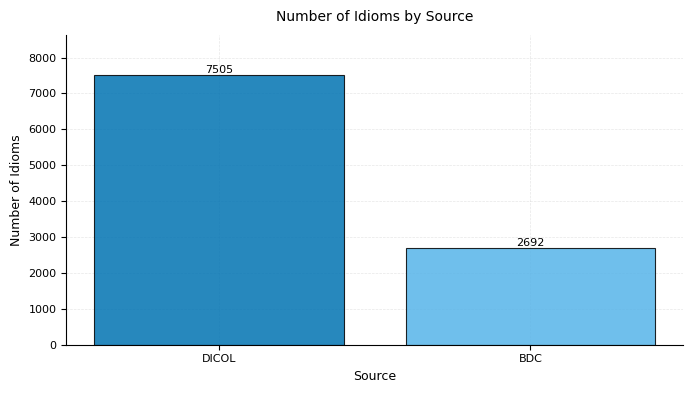

[2/8] Generando gráfico de proporción de ejemplos...


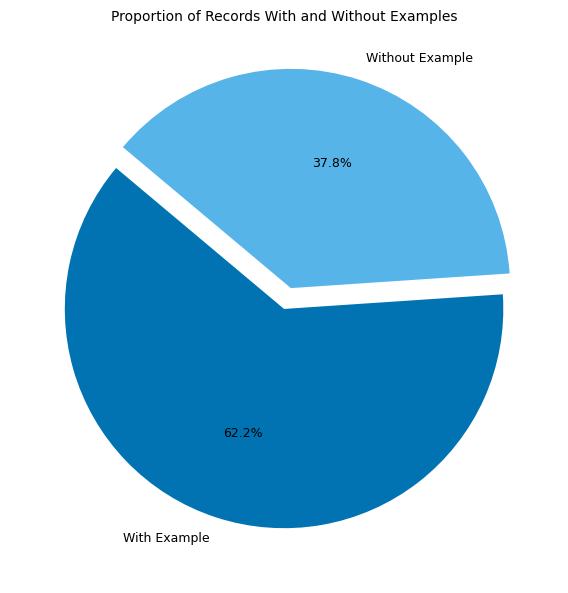

[3/8] Generando distribución de significados por modismo...


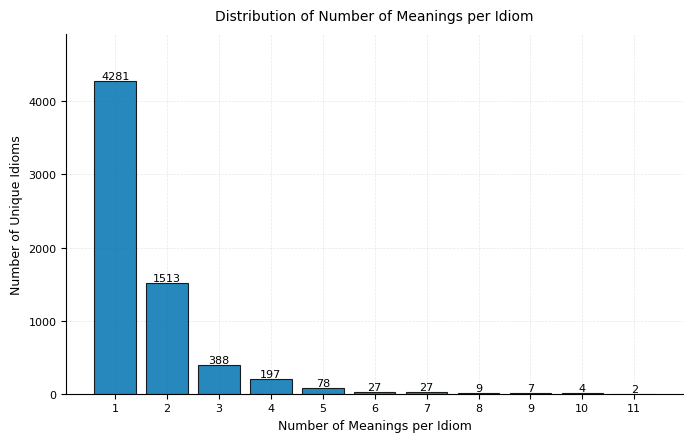

[4/8] Generando distribución de palabras por modismo...


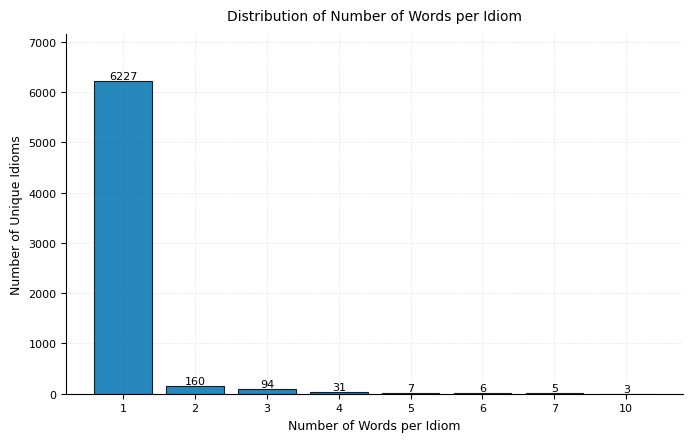

[5/8] Generando clasificación por categorías gramaticales...


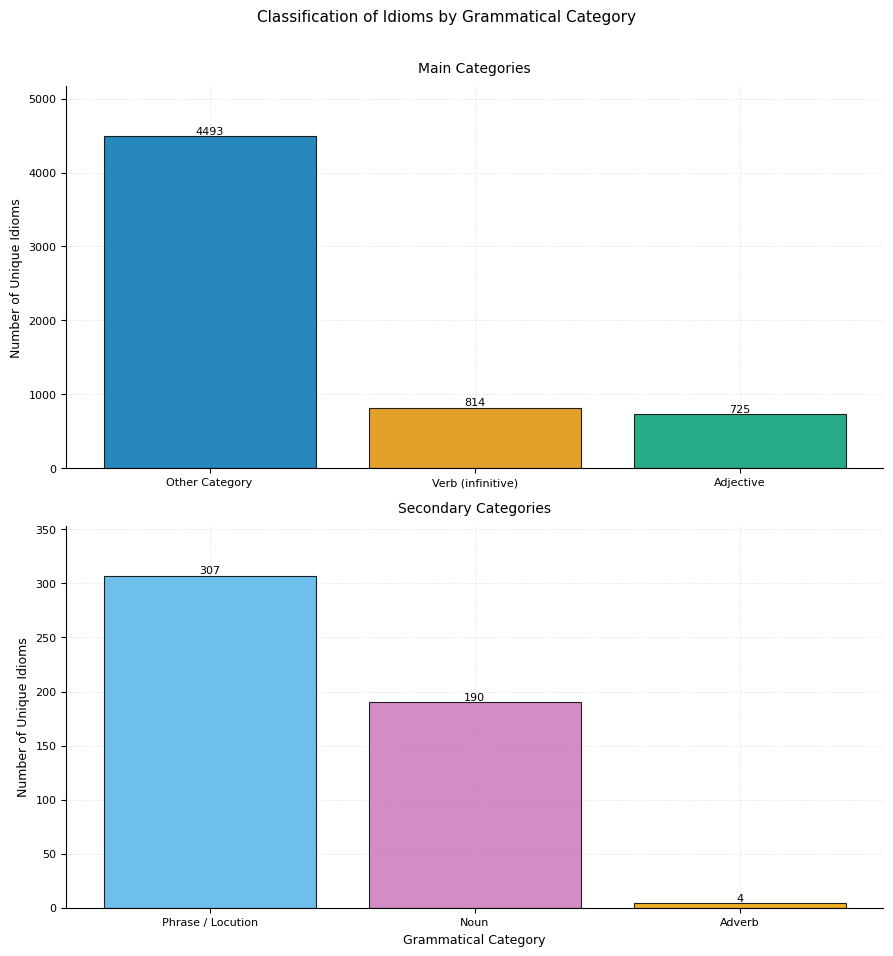

[6/8] Generando histogramas de longitud en caracteres...


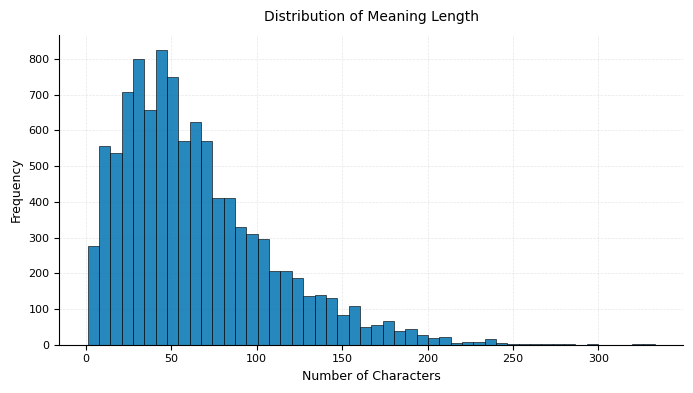

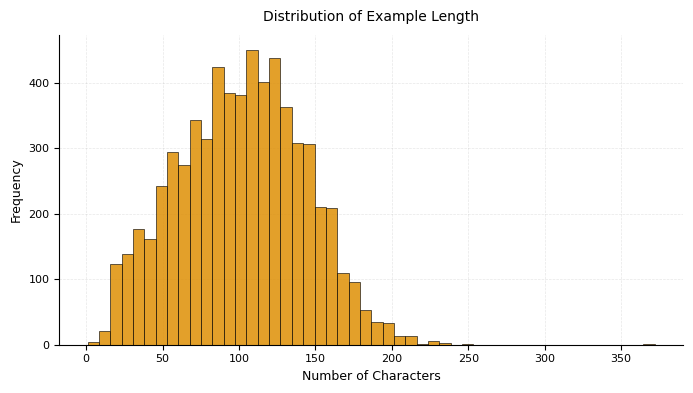

[7/8] Generando histogramas de longitud en palabras...


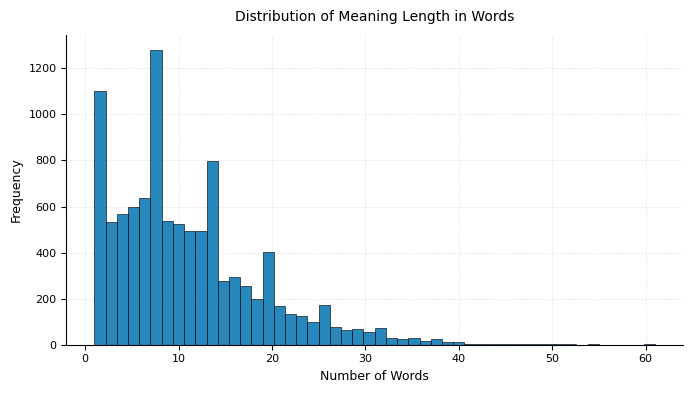

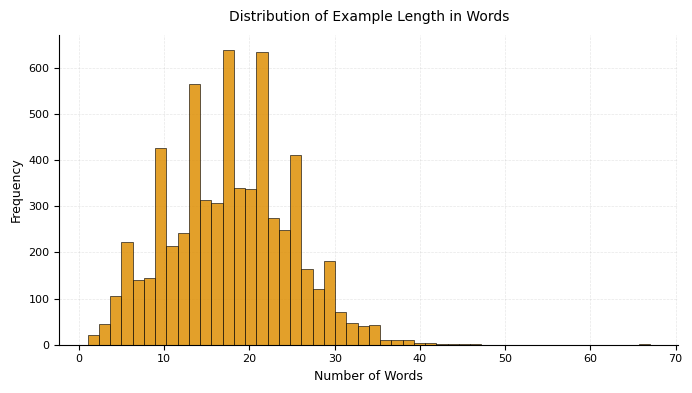

[8/8] Generando gráfico de ocurrencias por región...


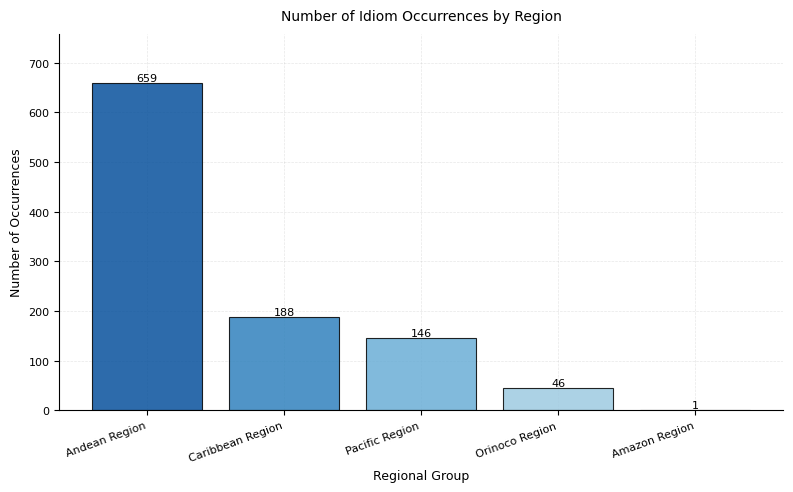


STATISTICS OF OCCURRENCES BY REGION
Total occurrences counted: 1,040
Total records with region in dataset: 611

Breakdown by region:
  Andean Region            :  659 ( 63.4%)
  Caribbean Region         :  188 ( 18.1%)
  Pacific Region           :  146 ( 14.0%)
  Orinoco Region           :   46 (  4.4%)
  Amazon Region            :    1 (  0.1%)

[9/10] Generando gráfico de modismos ÚNICOS por región...


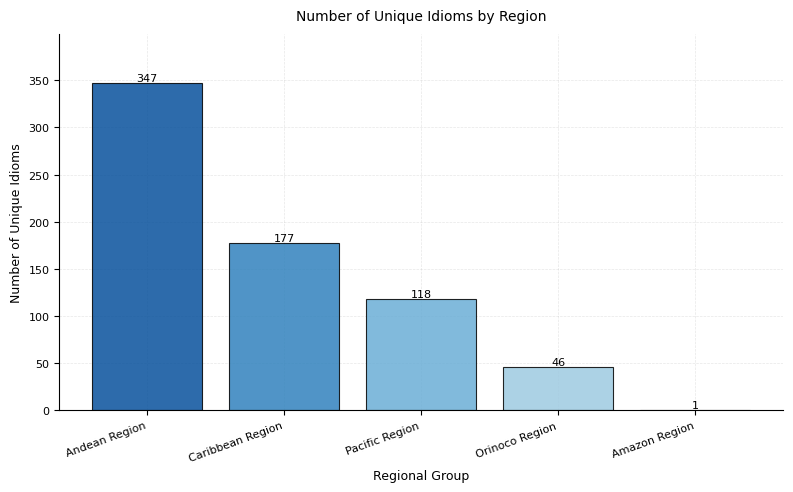


STATISTICS OF UNIQUE IDIOMS BY REGION
Total unique idioms in dataset: 6,533
Unique idioms with defined region: 554
Idioms appearing in multiple regions: 121

Sum of counts by region: 689

COUNTING RULE:
  • Each idiom counts 1 time per region (regardless of definitions)
  • Multiple departments in same region = 1 count
  • Only counts multiple times if in different regions

Breakdown by region:
  Andean Region            :  347 ( 50.4%)
  Caribbean Region         :  177 ( 25.7%)
  Pacific Region           :  118 ( 17.1%)
  Orinoco Region           :   46 (  6.7%)
  Amazon Region            :    1 (  0.1%)

[10/10] Generando distribución de modismos por cobertura regional...


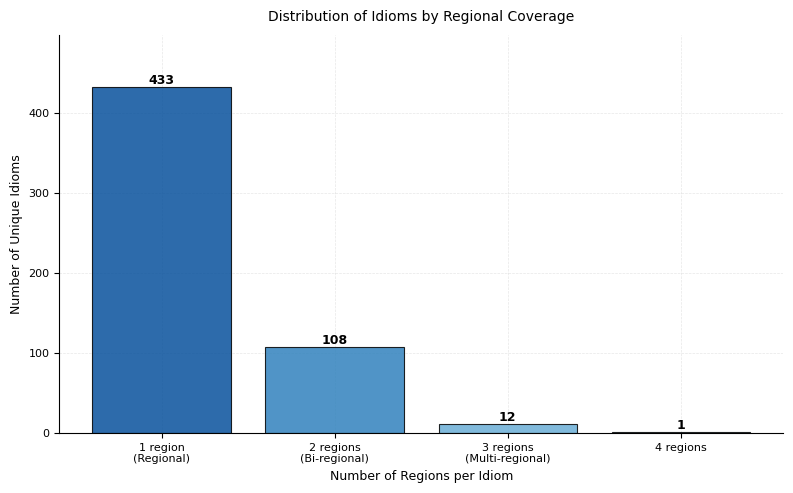


DISTRIBUTION OF 554 UNIQUE IDIOMS BY REGIONAL COVERAGE
Total unique idioms with region: 554

Regional idioms (appear in 1 region only): 433 (78.2%)
Multi-regional idioms (appear in 2+ regions): 121 (21.8%)

Detailed breakdown:
  Regional (exclusive to 1 region)             :  433 ( 78.2%)
  Multi-regional (shared across 2 regions)     :  108 ( 19.5%)
  Multi-regional (shared across 3 regions)     :   12 (  2.2%)
  Multi-regional (shared across 4 regions)     :    1 (  0.2%)


✓ TODAS LAS VISUALIZACIONES GENERADAS
✓ Figuras guardadas en: DataSet_Figures


In [2]:
# ============================================================================
# PARÁMETRO: Seleccionar archivo de datos
# ============================================================================

FILE_NAME = "DataSet.json"  # ← CAMBIAR AQUÍ SI SE DESEA ANALIZAR OTRO ARCHIVO

# Construcción de la ruta y carga del dataset
LOCATION = f"Complete_DataSets/{FILE_NAME}"
print(f"Cargando dataset: {LOCATION}")

data = load_data(LOCATION)

print(f"✓ Total de registros cargados: {len(data):,}")
print(f"✓ Columnas disponibles: {list(data.columns)}")

# ============================================================================
# Generación de todas las visualizaciones del dataset
# ============================================================================

print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80 + "\n")

print("[1/8] Generando gráfico de modismos por fuente...")
graficar_modismos_por_fuente(data)

print("[2/8] Generando gráfico de proporción de ejemplos...")
graficar_proporcion_ejemplos(data)

print("[3/8] Generando distribución de significados por modismo...")
graficar_distribucion_significados_por_modismo(data)

print("[4/8] Generando distribución de palabras por modismo...")
graficar_distribucion_palabras_por_modismo(data)

print("[5/8] Generando clasificación por categorías gramaticales...")
graficar_categorias_gramaticales_modismos(data, top_n=3)

print("[6/8] Generando histogramas de longitud en caracteres...")
graficar_longitud_textos(data)

print("[7/8] Generando histogramas de longitud en palabras...")
graficar_longitud_textos_por_palabras(data)

print("[8/8] Generando gráfico de ocurrencias por región...")
graficar_ocurrencias_por_region(data)

print("[9/10] Generando gráfico de modismos ÚNICOS por región...")
graficar_modismos_unicos_por_region(data)

print("[10/10] Generando distribución de modismos por cobertura regional...")
graficar_distribucion_modismos_por_regiones(data)

print("\n" + "="*80)
print("✓ TODAS LAS VISUALIZACIONES GENERADAS")
print(f"✓ Figuras guardadas en: {OUTPUT_DIR}")
print("="*80)